In [1]:
import os
import pandas as pd

data_dir = r"C:\Users\siddj\OneDrive\Desktop\ser dataset" 

valid_emotions = ["Neutral", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"]

def get_emotion_from_filename(filename, dataset):
    if dataset == "CREMA_D":
        emotion_map = {"NEU": "Neutral", "HAP": "Happy", "SAD": "Sad", 
                       "ANG": "Angry", "FEA": "Fearful", "DIS": "Disgust"}
        return emotion_map.get(filename.split("_")[2], None)
    
    elif dataset == "SAVEE":
        emotion_map = {"n": "Neutral", "h": "Happy", "sa": "Sad", "a": "Angry",
                       "f": "Fearful", "d": "Disgust", "su": "Surprised"}
        if filename[3:5] in emotion_map:
            return emotion_map.get(filename[3:5], None)
        elif filename[3] in emotion_map:
            return emotion_map.get(filename[3], None)
    
    elif dataset == "TESS":
        emotion_map = {"neutral": "Neutral", "happy": "Happy", "sad": "Sad",
                       "angry": "Angry", "fear": "Fearful", "disgust": "Disgust", "ps": "Surprised"}
        return emotion_map.get(filename.split("_")[-1].split(".")[0].lower(), None)
    
    elif dataset == "RAVDESS":
        emotion_map = {
            "01": "Neutral", "02": "Calm", "03": "Happy", "04": "Sad",
            "05": "Angry", "06": "Fearful", "07": "Disgust", "08": "Surprised"
        }
        return emotion_map.get(filename[-18:-16], None)
    
    return None  

data = []

for root, _, filenames in os.walk(data_dir):
    dataset_name = None
    if "crema_d" in root.lower():
        dataset_name = "CREMA_D"
    elif "savee" in root.lower():
        dataset_name = "SAVEE"
    elif "tess" in root.lower():
        dataset_name = "TESS"
    elif "ravdess" in root.lower():
        dataset_name = "RAVDESS"
    
    if dataset_name:
        for filename in filenames:
            file_path = os.path.join(root, filename)
            emotion = get_emotion_from_filename(filename, dataset_name)
            if emotion in valid_emotions:  
                data.append([file_path, emotion, dataset_name])

df = pd.DataFrame(data, columns=["Files", "emotion", "dataset_name"])
print(df.head())

                                               Files  emotion dataset_name
0  C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...    Angry      CREMA_D
1  C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...  Disgust      CREMA_D
2  C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...  Fearful      CREMA_D
3  C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...    Happy      CREMA_D
4  C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...  Neutral      CREMA_D


In [2]:
df

,Files,emotion,dataset_name
0,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Angry,CREMA_D
1,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Disgust,CREMA_D
2,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Fearful,CREMA_D
3,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Happy,CREMA_D
4,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Neutral,CREMA_D
...,...,...,...
16013,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS
16014,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS
16015,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS
16016,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS


In [3]:
df['filename'] = df['Files'].apply(lambda x: x.split('/')[-1])

new_df = df.drop_duplicates(subset=['filename'])

new_df.drop(columns=['filename'])

,Files,emotion,dataset_name
0,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Angry,CREMA_D
1,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Disgust,CREMA_D
2,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Fearful,CREMA_D
3,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Happy,CREMA_D
4,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Neutral,CREMA_D
...,...,...,...
16013,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS
16014,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS
16015,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS
16016,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS


In [4]:
new_df


,Files,emotion,dataset_name,filename
0,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Angry,CREMA_D,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...
1,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Disgust,CREMA_D,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...
2,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Fearful,CREMA_D,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...
3,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Happy,CREMA_D,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...
4,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Neutral,CREMA_D,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...
...,...,...,...,...
16013,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...
16014,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...
16015,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...
16016,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...,Sad,TESS,C:\Users\siddj\OneDrive\Desktop\ser dataset\TE...


In [5]:

speech_emotion_dict = {emotion: [] for emotion in set(new_df["emotion"])}

for _, row in new_df.iterrows():
    speech_emotion_dict[row["emotion"]].append(row["Files"])

for key, value in speech_emotion_dict.items():
    print(f"{key}: {len(value)} audio files")


Disgust: 2515 audio files
Happy: 2515 audio files
Surprised: 1244 audio files
Neutral: 2199 audio files
Sad: 2515 audio files
Angry: 2515 audio files
Fearful: 2515 audio files


In [6]:
surprise_audio = speech_emotion_dict.get("Surprised", [])
disgust_audio = speech_emotion_dict.get("Disgust", [])
happy_audio = speech_emotion_dict.get("Happy", [])
angry_audio = speech_emotion_dict.get("Angry", [])
neutral_audio = speech_emotion_dict.get("Neutral", [])
sad_audio = speech_emotion_dict.get("Sad", [])
fear_audio = speech_emotion_dict.get("Fearful", [])

In [7]:
surprise_audio

['C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-01-01-01-01.wav',
 'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-01-01-02-01.wav',
 'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-01-02-01-01.wav',
 'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-01-02-02-01.wav',
 'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-02-01-01-01.wav',
 'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-02-01-02-01.wav',
 'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-02-02-01-01.wav',
 'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-02-02-02-01.wav',
 'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_02\\03-01-08-01-01-01-02.wav',
 'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_02\\03-01-08-01-01-02-02.wav',
 'C:\\Users\\siddj\\

In [8]:
import numpy as np
import tensorflow as tf
import cv2
import os
import librosa
from glob import glob
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, Flatten
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


TRAIN_DIR = r"C:\Users\siddj\OneDrive\Desktop\Facial Emotion Recognition - Image Classification\train\train"

def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)  
        if os.path.isdir(label_path): 
            for filename in os.listdir(label_path):
                image_path = os.path.join(label_path, filename)
                image_paths.append(image_path)
                labels.append(label)

            print(label, "Completed")
        
    return image_paths, labels

train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

train = train.sample(frac=1).reset_index(drop=True)

train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,happy
1,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,happy
2,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,angry
3,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,happy
4,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,sad


In [9]:
emotion_dict = {}

for emotion in train['label'].unique():
    emotion_dict[emotion] = train[train['label'] == emotion]['image'].tolist()

for key, value in emotion_dict.items():
    print(f"{key}: {len(value)} images")
surprise_image = train[train['label'] == 'surprise']['image'].tolist()
disgust_image = train[train['label'] == 'disgust']['image'].tolist()
happy_image= train[train['label'] == 'happy']['image'].tolist()
angry_image = train[train['label'] == 'angry']['image'].tolist()
neutral_image = train[train['label'] == 'neutral']['image'].tolist()
sad_image= train[train['label'] == 'sad']['image'].tolist()
fear_image = train[train['label'] == 'fear']['image'].tolist()


happy: 7215 images
angry: 3995 images
sad: 4830 images
surprise: 3171 images
fear: 4097 images
neutral: 4965 images
disgust: 436 images


In [10]:
import itertools
def create_pairs(image_list, audio_list):
    pairs = []
    audio_cycle = itertools.cycle(audio_list)  
    for i in range(0, len(image_list), 30):  
        images_batch = image_list[i:i+30]
        audio = next(audio_cycle) 
        pairs.extend([(img, audio) for img in images_batch]) 
    return pairs

surprise_pairs = create_pairs(surprise_image, surprise_audio)
disgust_pairs = create_pairs(disgust_image, disgust_audio)
happy_pairs = create_pairs(happy_image, happy_audio)
angry_pairs = create_pairs(angry_image, angry_audio)
neutral_pairs = create_pairs(neutral_image, neutral_audio)
sad_pairs = create_pairs(sad_image, sad_audio)
fear_pairs = create_pairs(fear_image, fear_audio)

all_pairs = (
    surprise_pairs + disgust_pairs + happy_pairs + 
    angry_pairs + neutral_pairs + sad_pairs + fear_pairs
)

print(f"Surprise: {len(surprise_pairs)} pairs")
print(f"Disgust: {len(disgust_pairs)} pairs")
print(f"Happy: {len(happy_pairs)} pairs")
print(f"Angry: {len(angry_pairs)} pairs")
print(f"Neutral: {len(neutral_pairs)} pairs")
print(f"Sad: {len(sad_pairs)} pairs")
print(f"Fear: {len(fear_pairs)} pairs")
print(f"Total Pairs: {len(all_pairs)}")


Surprise: 3171 pairs
Disgust: 436 pairs
Happy: 7215 pairs
Angry: 3995 pairs
Neutral: 4965 pairs
Sad: 4830 pairs
Fear: 4097 pairs
Total Pairs: 28709


In [11]:
image= cv2.imread(r'C:\\Users\\siddj\\OneDrive\\Desktop\\Facial Emotion Recognition - Image Classification\\train\\train\\surprise\\Training_32053429.jpg')
image

array([[[234, 234, 234],
        [235, 235, 235],
        [236, 236, 236],
        ...,
        [239, 239, 239],
        [237, 237, 237],
        [237, 237, 237]],

       [[236, 236, 236],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [235, 235, 235],
        [238, 238, 238],
        [238, 238, 238]],

       [[237, 237, 237],
        [237, 237, 237],
        [238, 238, 238],
        ...,
        [242, 242, 242],
        [237, 237, 237],
        [238, 238, 238]],

       ...,

       [[199, 199, 199],
        [203, 203, 203],
        [202, 202, 202],
        ...,
        [175, 175, 175],
        [183, 183, 183],
        [180, 180, 180]],

       [[200, 200, 200],
        [203, 203, 203],
        [205, 205, 205],
        ...,
        [175, 175, 175],
        [181, 181, 181],
        [188, 188, 188]],

       [[200, 200, 200],
        [202, 202, 202],
        [204, 204, 204],
        ...,
        [176, 176, 176],
        [177, 177, 177],
        [182, 182, 182]]

In [12]:
surprise_pairs


[('C:\\Users\\siddj\\OneDrive\\Desktop\\Facial Emotion Recognition - Image Classification\\train\\train\\surprise\\Training_31736666.jpg',
  'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-01-01-01-01.wav'),
 ('C:\\Users\\siddj\\OneDrive\\Desktop\\Facial Emotion Recognition - Image Classification\\train\\train\\surprise\\Training_991508.jpg',
  'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-01-01-01-01.wav'),
 ('C:\\Users\\siddj\\OneDrive\\Desktop\\Facial Emotion Recognition - Image Classification\\train\\train\\surprise\\Training_41128189.jpg',
  'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-01-01-01-01.wav'),
 ('C:\\Users\\siddj\\OneDrive\\Desktop\\Facial Emotion Recognition - Image Classification\\train\\train\\surprise\\Training_17864264.jpg',
  'C:\\Users\\siddj\\OneDrive\\Desktop\\ser dataset\\ravdess\\Actor_01\\03-01-08-01-01-01-01.wav'),
 ('C:\\Users\\siddj\\OneDrive\\Desktop\\Facial

In [13]:
import pandas as pd

data = []

for img, audio in all_pairs:
    label = new_df.loc[new_df["Files"] == audio, "emotion"].values[0]  
    data.append((img, audio, label)) 

df = pd.DataFrame(data, columns=["Image_Path", "Audio_Path", "Emotion"])

df.to_csv("combined_dataset.csv", index=False)

print(df.head())


                                          Image_Path  \
0  C:\Users\siddj\OneDrive\Desktop\Facial Emotion...   
1  C:\Users\siddj\OneDrive\Desktop\Facial Emotion...   
2  C:\Users\siddj\OneDrive\Desktop\Facial Emotion...   
3  C:\Users\siddj\OneDrive\Desktop\Facial Emotion...   
4  C:\Users\siddj\OneDrive\Desktop\Facial Emotion...   

                                          Audio_Path    Emotion  
0  C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...  Surprised  
1  C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...  Surprised  
2  C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...  Surprised  
3  C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...  Surprised  
4  C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...  Surprised  


In [14]:
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def extract_features(image_paths):
    features = []
    for image in tqdm(image_paths, desc="Extracting Image Features"):
        try:
            img = load_img(image, color_mode="grayscale") 
            img = img_to_array(img)  
            features.append(img)
        except Exception as e:
            print(f"Error processing {image}: {e}")

    features = np.array(features)
    
    features = features.reshape(len(features), 48, 48, 1)
    
    return features

image_features = extract_features(df["Image_Path"])

print(f"Extracted Image Features Shape: {image_features.shape}")


Extracting Image Features: 100%|██████████| 28709/28709 [03:53<00:00, 122.88it/s]


Extracted Image Features Shape: (28709, 48, 48, 1)


In [15]:

image_features = image_features / 255.0


In [16]:
type(image_features)

numpy.ndarray

In [17]:
import librosa
import numpy as np
import pandas as pd

def extract_mfcc_features(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)  

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    delta_mfcc = librosa.feature.delta(mfcc)

    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    return mfcc, delta_mfcc, delta2_mfcc

mfcc_list, delta_mfcc_list, delta2_mfcc_list = [], [], []
max_length = 0  

for path in df['Audio_Path']:
    mfcc, delta_mfcc, delta2_mfcc = extract_mfcc_features(path)

    mfcc_list.append(mfcc)
    delta_mfcc_list.append(delta_mfcc)
    delta2_mfcc_list.append(delta2_mfcc)

    max_length = max(max_length, mfcc.shape[1])

def pad_feature(feature, max_length):
    return np.pad(feature, ((0, 0), (0, max_length - feature.shape[1])), mode='constant')

stacked_features_list = []

for mfcc, delta_mfcc, delta2_mfcc in zip(mfcc_list, delta_mfcc_list, delta2_mfcc_list):
    mfcc_padded = pad_feature(mfcc, max_length)
    delta_mfcc_padded = pad_feature(delta_mfcc, max_length)
    delta2_mfcc_padded = pad_feature(delta2_mfcc, max_length)

    stacked_features = np.stack([mfcc_padded, delta_mfcc_padded, delta2_mfcc_padded], axis=-1)
    stacked_features_list.append(stacked_features)

speech_features = np.array(stacked_features_list)

print("Final feature array shape:", speech_features.shape)

print(df.head())

Final feature array shape: (28709, 13, 388, 3)
                                          Image_Path  \
0  C:\Users\siddj\OneDrive\Desktop\Facial Emotion...   
1  C:\Users\siddj\OneDrive\Desktop\Facial Emotion...   
2  C:\Users\siddj\OneDrive\Desktop\Facial Emotion...   
3  C:\Users\siddj\OneDrive\Desktop\Facial Emotion...   
4  C:\Users\siddj\OneDrive\Desktop\Facial Emotion...   

                                          Audio_Path    Emotion  
0  C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...  Surprised  
1  C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...  Surprised  
2  C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...  Surprised  
3  C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...  Surprised  
4  C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...  Surprised  


In [18]:
max_length

388

In [19]:
speech_features.shape



(28709, 13, 388, 3)

In [20]:
from sklearn.preprocessing import StandardScaler

mfcc_reshaped = speech_features.reshape(speech_features.shape[0], -1)  

scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(mfcc_reshaped)

mfcc_features = mfcc_scaled.reshape(speech_features.shape)

print(f"MFCC Features Normalized Shape: {mfcc_features.shape}")


MFCC Features Normalized Shape: (28709, 13, 388, 3)


In [21]:
from tensorflow.keras.models import load_model

face_model = load_model(r"C:\Users\siddj\OneDrive\Desktop\Facial Emotion Recognition - Image Classification\fer.h5")

speech_model = load_model(r"C:\Users\siddj\OneDrive\Desktop\test\speech_cnn_model.h5")

print("Models Loaded Successfully!")


Models Loaded Successfully!


In [22]:
speech_model.summary(

)

Model: "Speech_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Speech_Conv2D_1 (Conv2D)        │ (None, 11, 613, 256)   │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_MaxPool_1 (MaxPooling2D) │ (None, 5, 306, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Conv2D_2 (Conv2D)        │ (None, 5, 306, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_MaxPool_2 (MaxPooling2D) │ (None, 2, 153, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Dropout_1 (Dropout)      │ (None, 2, 153, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Conv2D_3 (Conv2D)        │ (None, 2, 153, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_MaxPool_3 (MaxPooling2D) │ (None, 1, 76, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Dropout_2 (Dropout)      │ (None, 1, 76, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Conv2D_4 (Conv2D)        │ (None, 1, 76, 32)      │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Flatten (Flatten)        │ (None, 2432)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 16)             │        38,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Dropout_3 (Dropout)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Output_Layer (Dense)     │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433,513 (1.65 MB)

 Trainable params: 433,511 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [23]:

face_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,804,553 (22.14 MB)

 Trainable params: 5,804,551 (22.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [24]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model

input_tensor = Input(shape=(48, 48, 1))

x = face_model.layers[0](input_tensor)  

for layer in face_model.layers[1:]:
    x = layer(x)
    if layer.name == "conv2d_2":  
        break
intermediate_model = Model(inputs=input_tensor, outputs=x)

intermediate_model.summary()


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 46, 46, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,476,608 (5.63 MB)

 Trainable params: 1,476,608 (5.63 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
image_features_output= intermediate_model.predict(image_features)

print(f"Extracted Image Features Shape: {image_features_output.shape}")

898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step
Extracted Image Features Shape: (28709, 8, 8, 512)


In [26]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model

input_tensor = Input(shape=(mfcc_features.shape[1], mfcc_features.shape[2], 3))  

x = input_tensor
for layer in speech_model.layers:
    x = layer(x)
    if layer.name == "Speech_Conv2D_4": 
        break

pooled_output = tf.keras.layers.MaxPooling2D(pool_size=(1, 2))(x)

speech_feature_extractor = Model(inputs=input_tensor, outputs=pooled_output)

speech_feature_extractor.summary()


mfcc_features = mfcc_features.astype("float16")


batch_size = 32  
audio_features = speech_feature_extractor.predict(mfcc_features, batch_size=batch_size)

print(f"Extracted Audio Features Shape: {audio_features.shape}")


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 13, 388, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Conv2D_1 (Conv2D)        │ (None, 11, 386, 256)   │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_MaxPool_1 (MaxPooling2D) │ (None, 5, 193, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Conv2D_2 (Conv2D)        │ (None, 5, 193, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_MaxPool_2 (MaxPooling2D) │ (None, 2, 96, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Dropout_1 (Dropout)      │ (None, 2, 96, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Conv2D_3 (Conv2D)        │ (None, 2, 96, 64)      │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_MaxPool_3 (MaxPooling2D) │ (None, 1, 48, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Dropout_2 (Dropout)      │ (None, 1, 48, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Speech_Conv2D_4 (Conv2D)        │ (None, 1, 48, 32)      │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 24, 32)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,464 (1.50 MB)

 Trainable params: 394,464 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step
Extracted Audio Features Shape: (28709, 1, 24, 32)


In [27]:
import numpy as np
import tensorflow as tf

image_features_pooled = tf.keras.layers.GlobalAveragePooling2D()(image_features_output)
audio_features_pooled = tf.keras.layers.GlobalAveragePooling2D()(audio_features)

image_features_pooled = image_features_pooled.numpy()
audio_features_pooled = audio_features_pooled.numpy()

fused_features = np.concatenate((image_features_pooled, audio_features_pooled), axis=1)

print(f"Fused Feature Vector Shape: {fused_features.shape}")


Fused Feature Vector Shape: (28709, 544)


In [28]:
train


,image,label
0,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,happy
1,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,happy
2,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,angry
3,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,happy
4,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,sad
...,...,...
28704,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,angry
28705,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,surprise
28706,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,happy
28707,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,neutral


In [29]:
df


,Image_Path,Audio_Path,Emotion
0,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...,Surprised
1,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...,Surprised
2,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...,Surprised
3,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...,Surprised
4,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,C:\Users\siddj\OneDrive\Desktop\ser dataset\ra...,Surprised
...,...,...,...
28704,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Fearful
28705,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Fearful
28706,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Fearful
28707,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,C:\Users\siddj\OneDrive\Desktop\ser dataset\Cr...,Fearful


In [30]:
y=df['Emotion']

In [31]:
df['Emotion']

0        Surprised
1        Surprised
2        Surprised
3        Surprised
4        Surprised
           ...    
28704      Fearful
28705      Fearful
28706      Fearful
28707      Fearful
28708      Fearful
Name: Emotion, Length: 28709, dtype: object

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

print(f"Fused Features Shape: {fused_features.shape}")
print(f"Labels Shape: {y.shape}")

if fused_features.shape[0] != y.shape[0]:
    print("Warning: Mismatched data sizes. Aligning labels to features.")
    min_samples = min(fused_features.shape[0], y.shape[0])
    fused_features = fused_features[:min_samples]
    y = y[:min_samples]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))  
y_one_hot = to_categorical(y_encoded, num_classes=num_classes)

X_train, X_val, y_train, y_val = train_test_split(fused_features, y_one_hot, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

print(f"X_train shape after scaling: {X_train.shape}")
print(f"X_val shape after scaling: {X_val.shape}")

input_shape = X_train.shape[1]

fusion_model = Sequential([
    Input(shape=(input_shape,)),  
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')  
])

fusion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = fusion_model.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

train_loss, train_acc = fusion_model.evaluate(X_train, y_train)
val_loss, val_acc = fusion_model.evaluate(X_val, y_val)
print(f"Final Training Accuracy: {train_acc:.4f} | Validation Accuracy: {val_acc:.4f}")


Fused Features Shape: (28709, 544)
Labels Shape: (28709,)
X_train shape after scaling: (22967, 544)
X_val shape after scaling: (5742, 544)
Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3453 - loss: 2.6854 - val_accuracy: 0.5846 - val_loss: 1.9346
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5455 - loss: 1.9059 - val_accuracy: 0.6299 - val_loss: 1.5567
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5994 - loss: 1.5992 - val_accuracy: 0.6470 - val_loss: 1.3902
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6332 - loss: 1.4098 - val_accuracy: 0.6625 - val_loss: 1.2829
Epoch 5/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6342 - loss: 1.3451 - val_accuracy: 0.6569 - val_loss: 1.2329
Epoch 6/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6410 - loss: 1.2967 - val_accuracy: 0.6529 - val_loss: 1.2510
Epoch 7/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6501 - loss: 1.2691 - val_a

In [45]:
fusion_model.save("fusion.h5")

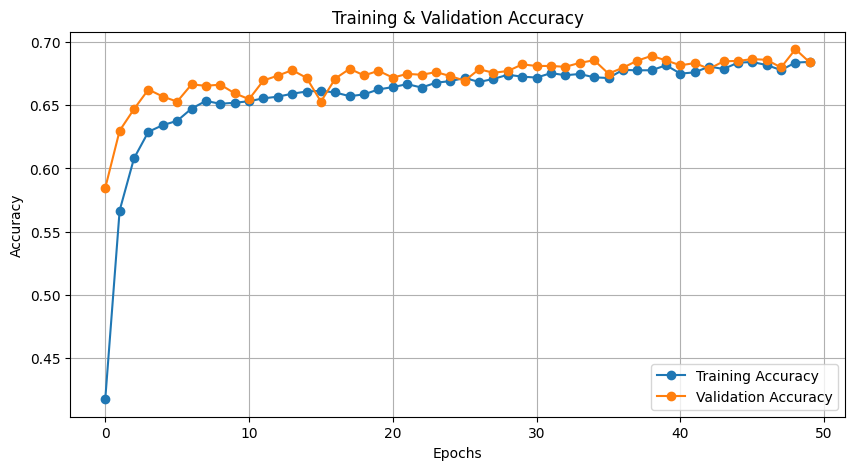

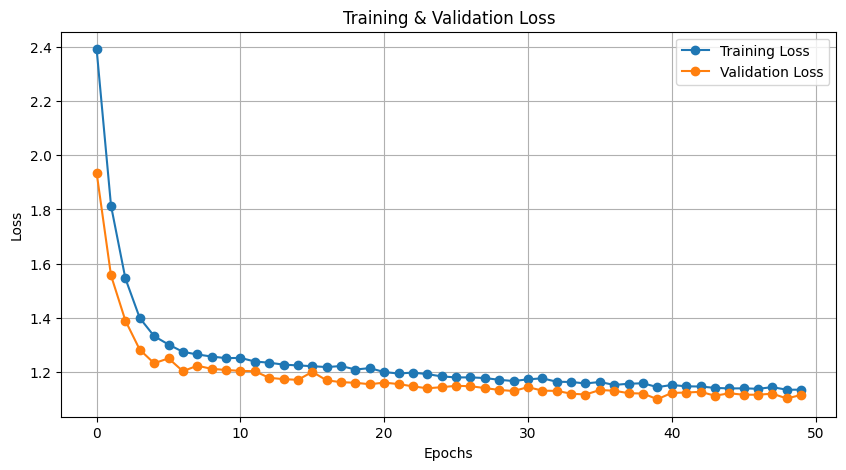

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss Graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid()
plt.show()


C:\Users\siddj\AppData\Local\Temp\ipykernel_30488\457939341.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=classes, x=counts, palette='Blues_r')


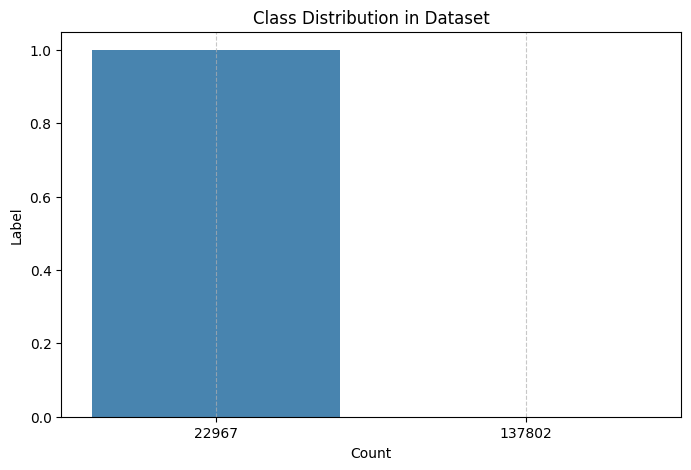

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

y_train_flat = np.ravel(y_train)  

class_counts = Counter(y_train_flat)

classes = list(class_counts.keys())
counts = list(class_counts.values())

sorted_indices = np.argsort(counts)
classes = [classes[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

plt.figure(figsize=(8, 5))
sns.barplot(y=classes, x=counts, palette='Blues_r')  
plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Class Distribution in Dataset")
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()


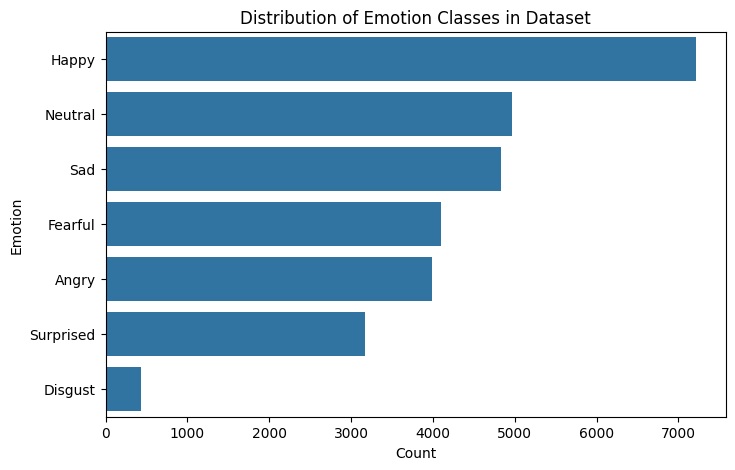

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

emotion_counts = df["Emotion"].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=emotion_counts.values, y=emotion_counts.index)
plt.xlabel("Count")
plt.ylabel("Emotion")
plt.title("Distribution of Emotion Classes in Dataset")


plt.show()


180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Accuracy: 0.6839

Classification Report (Per Class Only):
           precision    recall  f1-score      support
Angry       0.742254  0.629630  0.681319   837.000000
Disgust     0.536585  0.241758  0.333333    91.000000
Fearful     0.576923  0.429688  0.492537   768.000000
Happy       0.749534  0.824334  0.785156  1463.000000
Neutral     0.536647  0.648016  0.587097   983.000000
Sad         0.586720  0.601015  0.593781   985.000000
Surprised   0.998371  0.996748  0.997559   615.000000
accuracy    0.683908  0.683908  0.683908     0.683908


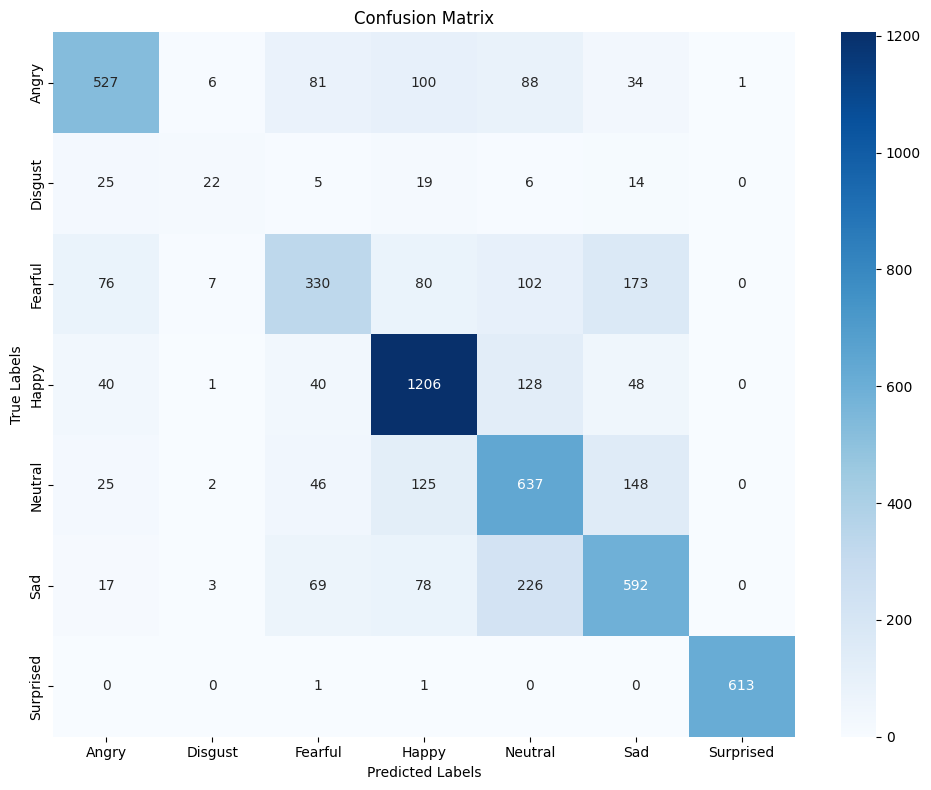

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = fusion_model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

# Classification report
report = classification_report(
    y_true_labels, 
    y_pred_labels, 
    target_names=encoder.classes_, 
    output_dict=True
)

# Extract and print overall accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"\nAccuracy: {accuracy:.4f}\n")

# Remove 'macro avg' and 'weighted avg'
for key in ['macro avg', 'weighted avg']:
    report.pop(key, None)

# Convert to DataFrame and display
report_df = pd.DataFrame(report).transpose()
print("Classification Report (Per Class Only):")
print(report_df)

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, 
            yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import librosa

# Test dataset paths (make sure these are valid paths in your system for the test)
test_image_dir = r"C:\Users\siddj\OneDrive\Desktop\Facial Emotion Recognition - Image Classification\train\train"  # Replace with your actual test image directory
test_audio_dir = r"C:\Users\siddj\OneDrive\Desktop\ser dataset"  # Replace with your actual test audio directory

# Simulate loading test images and audio files
def load_test_data(image_dir, audio_dir):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith('.jpg')]
    audio_paths = [os.path.join(audio_dir, audio) for audio in os.listdir(audio_dir) if audio.endswith('.wav')]
    
    # Ensure equal number of samples from both datasets
    min_samples = min(len(image_paths), len(audio_paths))
    image_paths = image_paths[:min_samples]
    audio_paths = audio_paths[:min_samples]
    
    return image_paths, audio_paths

# Test Feature Extraction Functions
def test_extract_image_features(image_paths):
    features = []
    for image_path in image_paths:
        img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
        img_array = img_to_array(img)
        features.append(img_array)
    return np.array(features)

def test_extract_audio_features(audio_paths):
    mfcc_list = []
    for audio_path in audio_paths:
        y, sr = librosa.load(audio_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        delta_mfcc = librosa.feature.delta(mfcc)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)
        # Pad and stack features
        mfcc_padded = np.pad(mfcc, ((0, 0), (0, 160 - mfcc.shape[1])), mode='constant')
        delta_mfcc_padded = np.pad(delta_mfcc, ((0, 0), (0, 160 - delta_mfcc.shape[1])), mode='constant')
        delta2_mfcc_padded = np.pad(delta2_mfcc, ((0, 0), (0, 160 - delta2_mfcc.shape[1])), mode='constant')
        stacked_features = np.stack([mfcc_padded, delta_mfcc_padded, delta2_mfcc_padded], axis=-1)
        mfcc_list.append(stacked_features)
    return np.array(mfcc_list)

# Test Fusion Model Prediction
def test_fusion_model(image_features, audio_features, model):
    # Normalize image features
    image_features = image_features.astype('float32') / 255.0
    image_features_pooled = np.mean(image_features, axis=(1, 2, 3))  # Simulating GlobalAveragePooling2D

    # Normalize audio features
    audio_features = audio_features.astype('float32')
    audio_features_pooled = np.mean(audio_features, axis=(1, 2, 3))  # Simulating GlobalAveragePooling2D

    # Fusing features (flattening pooled features for the final input)
    fused_features = np.concatenate((image_features_pooled, audio_features_pooled), axis=1)
    
    # Predict using the fusion model
    prediction = model.predict(fused_features)
    return prediction

# Load models (assumes models are saved at specified paths)
fusion_model = load_model(r"C:\Users\siddj\OneDrive\Desktop\path_to_your_fusion_model.h5")  # Replace with your actual fusion model path

# Test data
image_paths, audio_paths = load_test_data(test_image_dir, test_audio_dir)

# Feature extraction
image_features = test_extract_image_features(image_paths)
audio_features = test_extract_audio_features(audio_paths)

# Test the model prediction
test_prediction = test_fusion_model(image_features, audio_features, fusion_model)

# Print the prediction
print(f"Prediction for test data: {test_prediction}")


AxisError: axis 1 is out of bounds for array of dimension 1